<a href="https://colab.research.google.com/github/Azzaliazhr/Mini-Project-AI-Machine-Learning/blob/main/Azzalia%20Zahra%20Zamzani_Student%20Scores%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Azzalia Zahra Zamzani

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
uploaded = files.upload()
df_student = pd.read_excel('student_scores.xlsx')
df_student.head()

Saving student_scores.xlsx to student_scores (2).xlsx


,Hours (x),Scores (y)
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Cek duplikat
print("Duplicated rows:", df_student.duplicated().sum())

Duplicated rows: 0


In [ ]:
# Cek missing value
print("Missing values:\n", df_student.isnull().sum())

Missing values:
 Hours (x)     0
Scores (y)    0
dtype: int64


In [ ]:
# Outlier Analysis
Q1 = df_student.quantile(0.25)
Q3 = df_student.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_student < (Q1 - 1.5 * IQR)) | (df_student > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier count:\n", outliers)


Outlier count:
 Hours (x)     0
Scores (y)    0
dtype: int64


In [ ]:
# SPLIT DATASET
X = df_student[['Hours (x)']]
y = df_student['Scores (y)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Modeling machine learning regression**

In [ ]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


In [ ]:
# Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

**Evaluasi Model**

In [ ]:
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2:", r2_score(y_test, y_pred_lin))


Linear Regression:
MSE: 18.943211722315272
R2: 0.9678055545167994


In [ ]:
print("\nDecision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2:", r2_score(y_test, y_pred_tree))


Decision Tree Regressor:
MSE: 31.7
R2: 0.9461250849762066


In [ ]:
print("Random Forest Regressor:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
Mean Squared Error (MSE): 13.045153611111104
R-squared (R2): 0.9778294466160586


**Visualisasi Data**

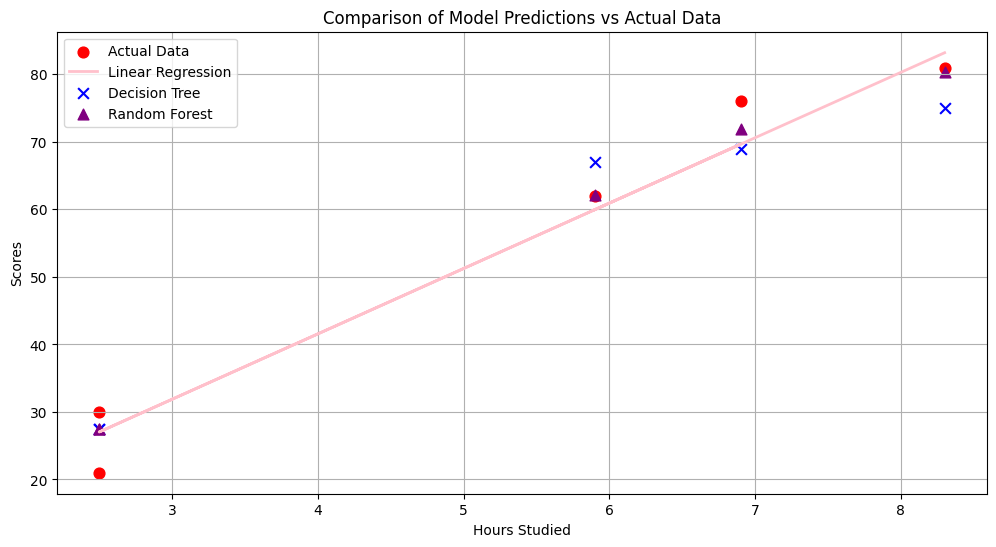

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Titik data asli
plt.scatter(X_test, y_test, color='red', label='Actual Data', s=60)

# Hasil prediksi dari ketiga model
plt.plot(X_test, y_pred_lin, color='pink', label='Linear Regression', linewidth=2)
plt.scatter(X_test, y_pred_tree, color='blue', label='Decision Tree', marker='x', s=60)
plt.scatter(X_test, y_pred_rf, color='purple', label='Random Forest', marker='^', s=60)
plt.title('Comparison of Model Predictions vs Actual Data')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

# Kesimpulan
Model yang terbaik performanya adalah Random Forest Regressor karena:

1.   Nilai MSE paling kecil (prediksi paling akurat)
2.   Nilai R² Score paling tinggi (model menjelaskan variasi data paling baik)